In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('output.csv')
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
volume             float64
issue              float64
publisher           object
weight              object
indexed_keyword     object
inverted_index      object
dtype: object

In [3]:
df.head()

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,venue_name,venue_type,doi,keyword,volume,issue,publisher,weight,indexed_keyword,inverted_index
0,1091,Preliminary Design of a Network Protocol Learn...,2013.0,Makoto Satoh;Ryo Muramatsu;Mizue Kayama;Kazuno...,Shinshu University;Shinshu University;Shinshu ...,2312688602;2482909946;2128134587;2101782692;21...,1.0,Conference,2.0,2005687710;2018037215,...,International Conference on Human-Computer Int...,C,https://doi.org/10.1007/978-3-642-39476-8_19,Telecommunications network;Computer science;Mi...,NaN,NaN,"Springer, Berlin, Heidelberg",0.45139;0.45245;0.5347;0.47011;0.46629;0.49737...,tool.;study;aim;purpose;scientific;for;aspects...,"[42];[4];[37];[1];[17];[11];[18];[14, 46];[27]..."
1,1388,Further Results on Independence in Direct-Prod...,2000.0,NaN,NaN,NaN,1.0,Journal,NaN,NaN,...,Ars Combinatoria,J,NaN,Graph;Discrete mathematics;Combinatorics;Direc...,56.0,NaN,NaN,0.0;0.45872;0.4515;0.59104;0.42784,NaN,NaN
2,1674,A methodology for the physically accurate visu...,2011.0,G. Beale;G. Earl,"Archaeological Computing Research Group, Unive...",2103626414;2117665592,1.0,Conference,15.0,1535888970;1992876689;1993710814;2035653341;20...,...,International Conference on Virtual Reality,C,https://doi.org/10.2312/VAST/VAST11/137-144,Statue;Engineering drawing;Virtual reconstruct...,NaN,NaN,Eurographics Association,0.40216;0.43427;0.0;0.42062;0.4595;0.4474;0.40496,illustrating;accurate;objects;accuracy;collect...,"[59];[43, 108];[112];[89];[154];[30];[33];[119..."
3,1688,"Comparison of GARCH, Neural Network and Suppor...",2009.0,Altaf Hossain;Faisal Zaman;M. Nasser;M. Mufakh...,"Department of Statistics , Rajshahi University...",2300589394;2308774408;2126056503;2425818370,6.0,Conference,3.0,1560724230;1986968751;2156909104,...,Pattern Recognition and Machine Intelligence,C,https://doi.org/10.1007/978-3-642-11164-8_97,Autoregressive–moving-average model;Computer s...,NaN,NaN,"Springer, Berlin, Heidelberg",0.49811;0.41114;0.51884;0.0;0.0;0.0;0.49542;0....,standard;compare;superiority;indices.;applied;...,"[14, 53];[11];[44];[63];[2];[40];[17, 46];[25]..."
4,5411,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,nan;nan;nan;nan,nan;nan;nan;nan,nan;nan;nan;nan,NaN,Conference,NaN,NaN,...,International Conference on Computer Graphics ...,C,NaN,Computer vision;Polygon mesh;Computer graphics...,NaN,NaN,NaN,0.44692;0.53319;0.46151;0.42074;0.0;0.61991,NaN,NaN


# Hypothesis 3:
> Older papers have accumulated more citations over time than newer papers.

- Null Hypothesis (H₀): There is no correlation between publication year and the number of citations.
- Alternative Hypothesis (H₁): There is a negative correlation between publication year and the number of citations.

### We will be using the **Spearman Correlation test** as it measure monotonic relationships

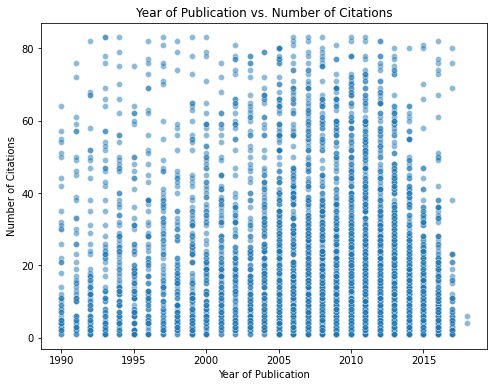

Spearman Correlation Coefficient: -0.1734
P-value: 6.9893e-39
Reject the null hypothesis: Older papers have more citations.


In [3]:
# Extract necessary columns and drop missing values
df = df[['year', 'n_citation']].dropna()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='year', y='n_citation', alpha=0.5)
plt.title('Year of Publication vs. Number of Citations')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Citations')
plt.show()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(df['year'], df['n_citation'])

print(f"Spearman Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    if corr_coef < 0:
        print("Reject the null hypothesis: Older papers have more citations.")
    else:
        print("Reject the null hypothesis: Newer papers have more citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between year and citations.")

> Negative correlation => older papers tend to have more citations

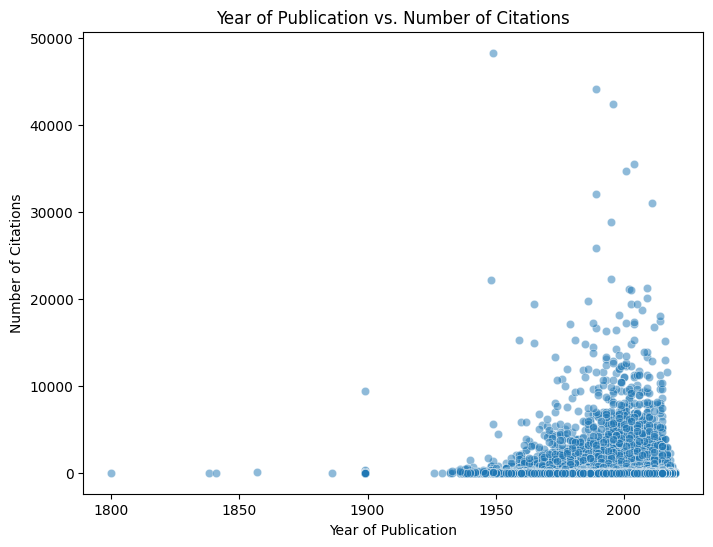

Spearman Correlation Coefficient: -0.2882
P-value: 0.0000e+00
Reject the null hypothesis: Older papers have more citations.


In [6]:
# Extract necessary columns and drop missing values
df_new = df[['year', 'n_citation']].dropna()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_new, x='year', y='n_citation', alpha=0.5)
plt.title('Year of Publication vs. Number of Citations')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Citations')
plt.show()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(df_new['year'], df_new['n_citation'])

print(f"Spearman Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    if corr_coef < 0:
        print("Reject the null hypothesis: Older papers have more citations.")
    else:
        print("Reject the null hypothesis: Newer papers have more citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between year and citations.")

# H2

In [7]:
# Extract necessary columns and drop missing values
df_new = df[['author_name', 'n_citation']].dropna()

# Calculate the number of authors for each paper
df_new['num_authors'] = df_new['author_name'].apply(lambda x: len(x.split(';')))


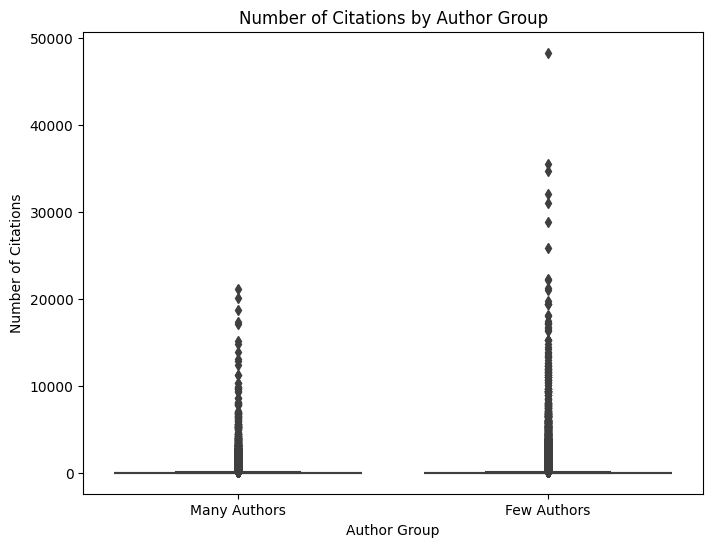

NameError: name 'ttest_ind' is not defined

In [8]:
# Determine the median number of authors
median_authors = df_new['num_authors'].median()

# Label papers as 'Many Authors' or 'Few Authors' based on median
df_new['author_group'] = np.where(df_new['num_authors'] > median_authors, 'Many Authors', 'Few Authors')

# Boxplot to visualize the differences
plt.figure(figsize=(8, 6))
sns.boxplot(x='author_group', y='n_citation', data=df_new)
plt.title('Number of Citations by Author Group')
plt.xlabel('Author Group')
plt.ylabel('Number of Citations')
plt.show()

# Separate the groups
group_many_authors = df_new[df_new['author_group'] == 'Many Authors']['n_citation']
group_few_authors = df_new[df_new['author_group'] == 'Few Authors']['n_citation']



In [9]:
from scipy.stats import ttest_ind
# Perform the t-test
t_stat, p_value = ttest_ind(group_many_authors, group_few_authors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Papers with more authors have significantly more num citations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in citations based on the number of authors.")

T-Statistic: -16.4663
P-value: 6.4461e-61
Reject the null hypothesis: Papers with more authors have significantly more num citations.


# H5

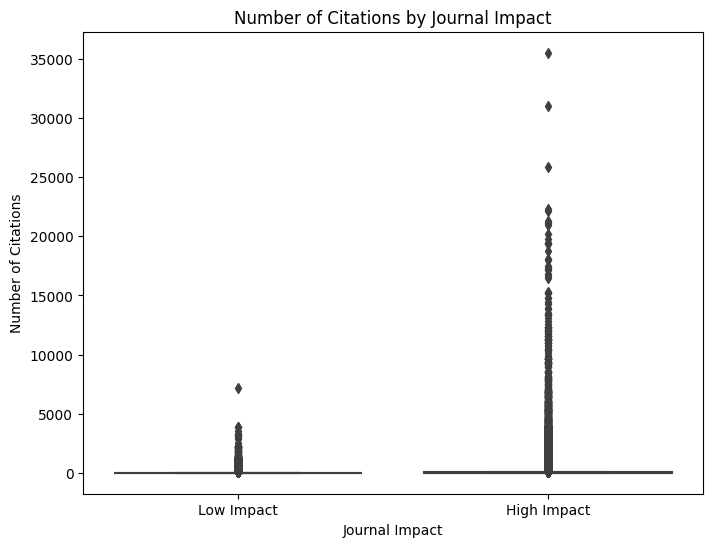

T-Statistic: 216.5702
P-value: 0.0000e+00
Reject the null hypothesis: High-impact journals have significantly higher citation counts.


In [10]:
# Ensure necessary columns are present
df_cleaned = df[['venue_name', 'n_citation']].dropna()

# Calculate average citations per journal
journal_citation_stats = df_cleaned.groupby('venue_name')['n_citation'].mean().reset_index()
journal_citation_stats.rename(columns={'n_citation': 'avg_citations'}, inplace=True)

# Merge back to the main DataFrame
df_merged = pd.merge(df_cleaned, journal_citation_stats, on='venue_name', how='left')

# Determine the median of average citations
median_avg_citations = df_merged['avg_citations'].median()

# Classify journals as 'High Impact' or 'Low Impact'
df_merged['journal_impact'] = np.where(df_merged['avg_citations'] > median_avg_citations, 'High Impact', 'Low Impact')


# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='journal_impact', y='n_citation', data=df_merged)
plt.title('Number of Citations by Journal Impact')
plt.xlabel('Journal Impact')
plt.ylabel('Number of Citations')
plt.show()

# Separate the groups
group_high_impact = df_merged[df_merged['journal_impact'] == 'High Impact']['n_citation']
group_low_impact = df_merged[df_merged['journal_impact'] == 'Low Impact']['n_citation']

# Perform the t-test
t_stat, p_value = ttest_ind(group_high_impact, group_low_impact, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: High-impact journals have significantly higher citation counts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in citation counts between journal impact levels.")